## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
df = pd.read_csv('/Users/puru/Desktop/100 Days of Python /Day-73/QueryResults.csv', 
                 names=['DATE', 'TAG', 'POSTS'], 
                 header=0)


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [5]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
df.shape

(2817, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [7]:
df.count()

DATE     2817
TAG      2817
POSTS    2817
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [8]:
df.groupby("TAG").sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,45114
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,407964
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1624576
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,814574
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,52494
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,74438
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1919372
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2529717
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68351


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [9]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,203,203
c,203,203
c#,204,204
c++,203,203
delphi,203,203
go,188,188
java,203,203
javascript,203,203
perl,203,203


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [10]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [11]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [15]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [16]:
reshaped_df.shape

(204, 14)

In [18]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [19]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,319.0,1638.0,752.0,104.0,NaN,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1983.0,804.0,112.0,NaN,1143.0,720.0,128.0,602.0,504.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,951.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [20]:
reshaped_df.count()

TAG
assembly      203
c             203
c#            204
c++           203
delphi        203
go            188
java          203
javascript    203
perl          203
php           203
python        203
r             201
ruby          203
swift         194
dtype: int64

In [21]:
reshaped_df.fillna(0, inplace=True) 

In [22]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,319.0,1638.0,752.0,104.0,0.0,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,0.0
2008-10-01,16.0,302.0,1983.0,804.0,112.0,0.0,1143.0,720.0,128.0,602.0,504.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,951.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [23]:
reshaped_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

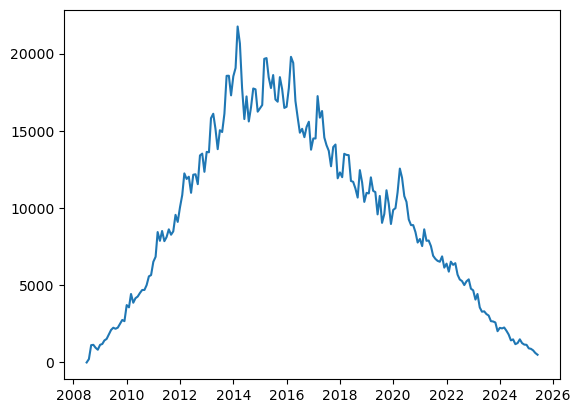

In [24]:
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

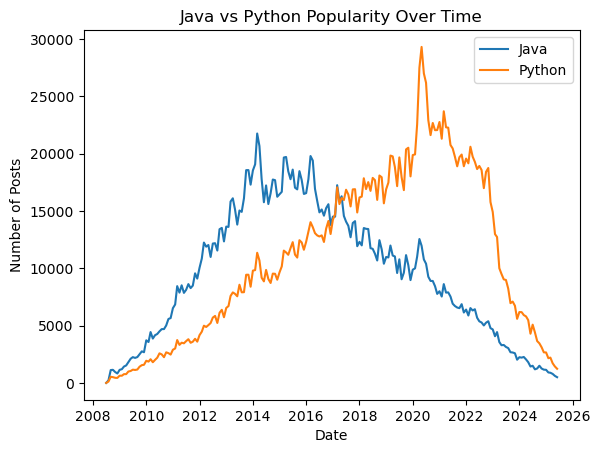

In [26]:
plt.plot(reshaped_df.index, reshaped_df['java'], label='Java')
plt.plot(reshaped_df.index, reshaped_df['python'], label='Python')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Java vs Python Popularity Over Time')
plt.show()


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

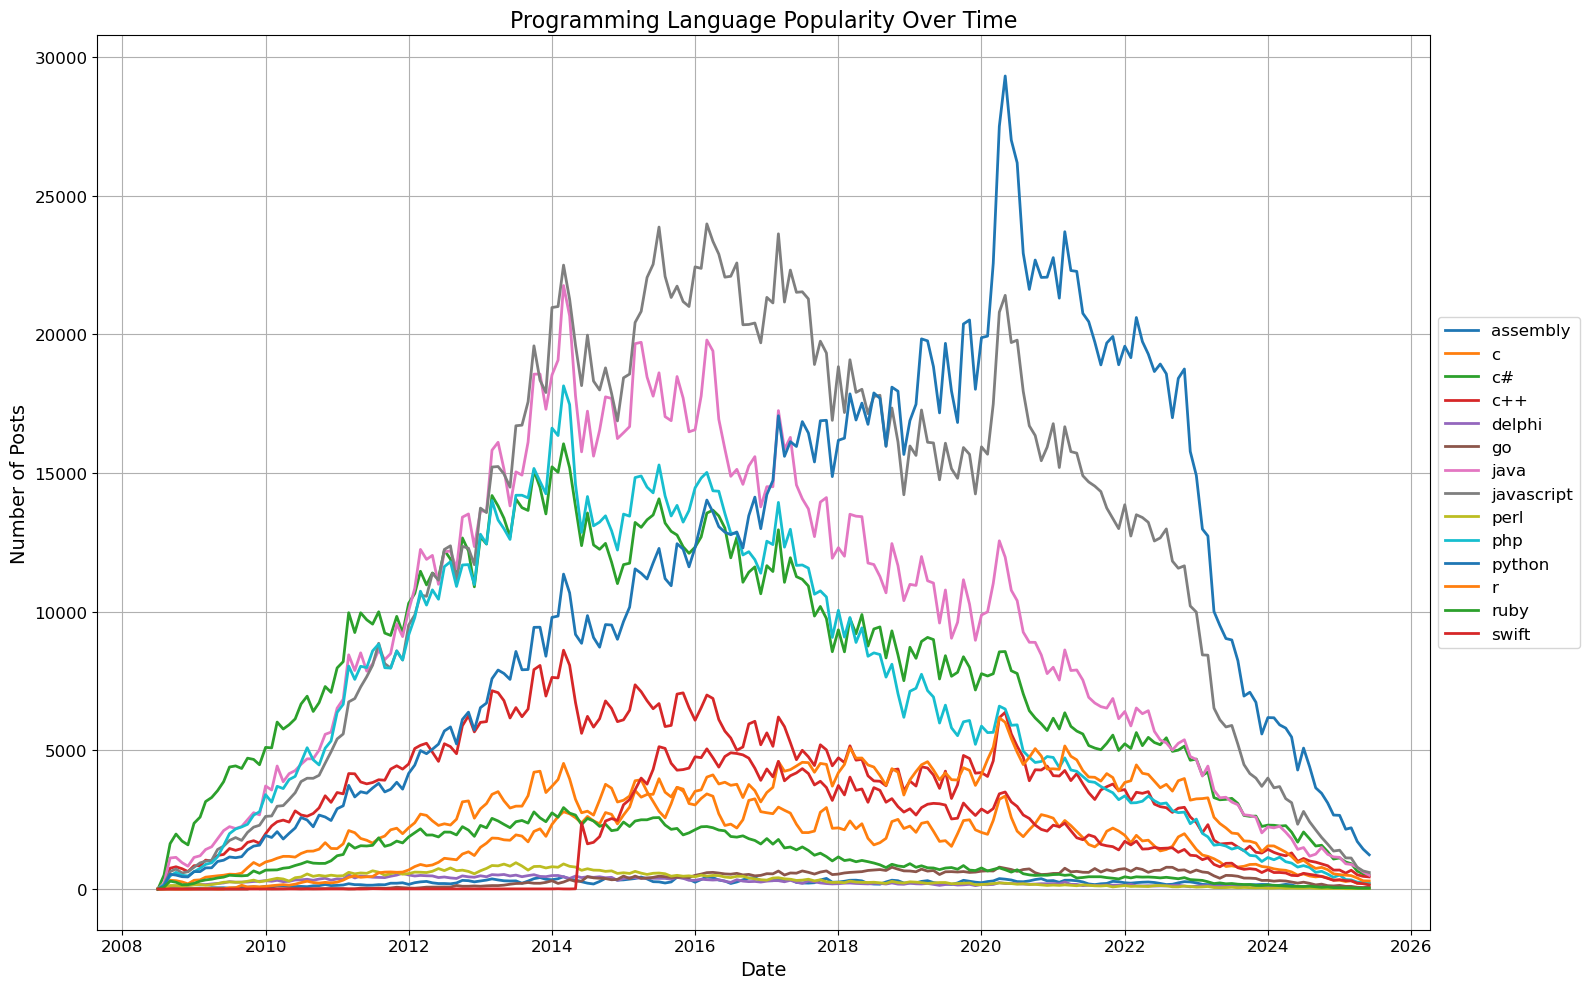

In [30]:
plt.figure(figsize=(16, 10))

# Customize ticks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Programming Language Popularity Over Time', fontsize=16)

# Limit y-axis if needed
# plt.ylim(0, 35000)  # You can comment this out to let matplotlib auto-scale

# Plot all languages
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=2, label=column)

# Show legend outside the plot for better visibility
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.tight_layout()
plt.grid(True)
plt.show()


## 📈 Interpretation of Programming Language Popularity Over Time

This line chart visualizes the number of Stack Overflow posts for various programming languages from **2008 to 2025**. It helps identify long-term trends in language usage and developer interest based on post frequency.

### 🔍 Key Observations:

- **JavaScript**, **Java**, and **Python** have consistently been among the most discussed languages.
  - **JavaScript** shows a strong peak around **2016–2019**, then declines gradually.
  - **Python** rises sharply after **2012**, peaking near **2020**, then slightly declines but remains strong.
  - **Java** had steady popularity but began a noticeable decline after **2017**.

- **C#**, **PHP**, and **C++** also show strong mid-decade popularity:
  - All of these peak around **2014–2016**, then decline.
  - **PHP** and **C#** have similar arcs, showing decline in modern developer discussion.

- **Go** and **Swift** appear later (post-2010) and rise gradually:
  - They show **modest but growing adoption** before slightly flattening.

- **Older languages** like **Perl**, **Delphi**, and **Assembly** maintain **minimal popularity**, slowly tapering off over time.

- **Sharp Declines After 2020**:
  - Almost all languages exhibit a drop after **2020**, likely due to changes in Stack Overflow usage or global developer trends.

###  Additional Notes:

- The **Y-axis** (Number of Posts) is limited to **35,000** to focus on visibility and avoid distortion by outliers.
- The **legend** is placed outside the graph for clarity.


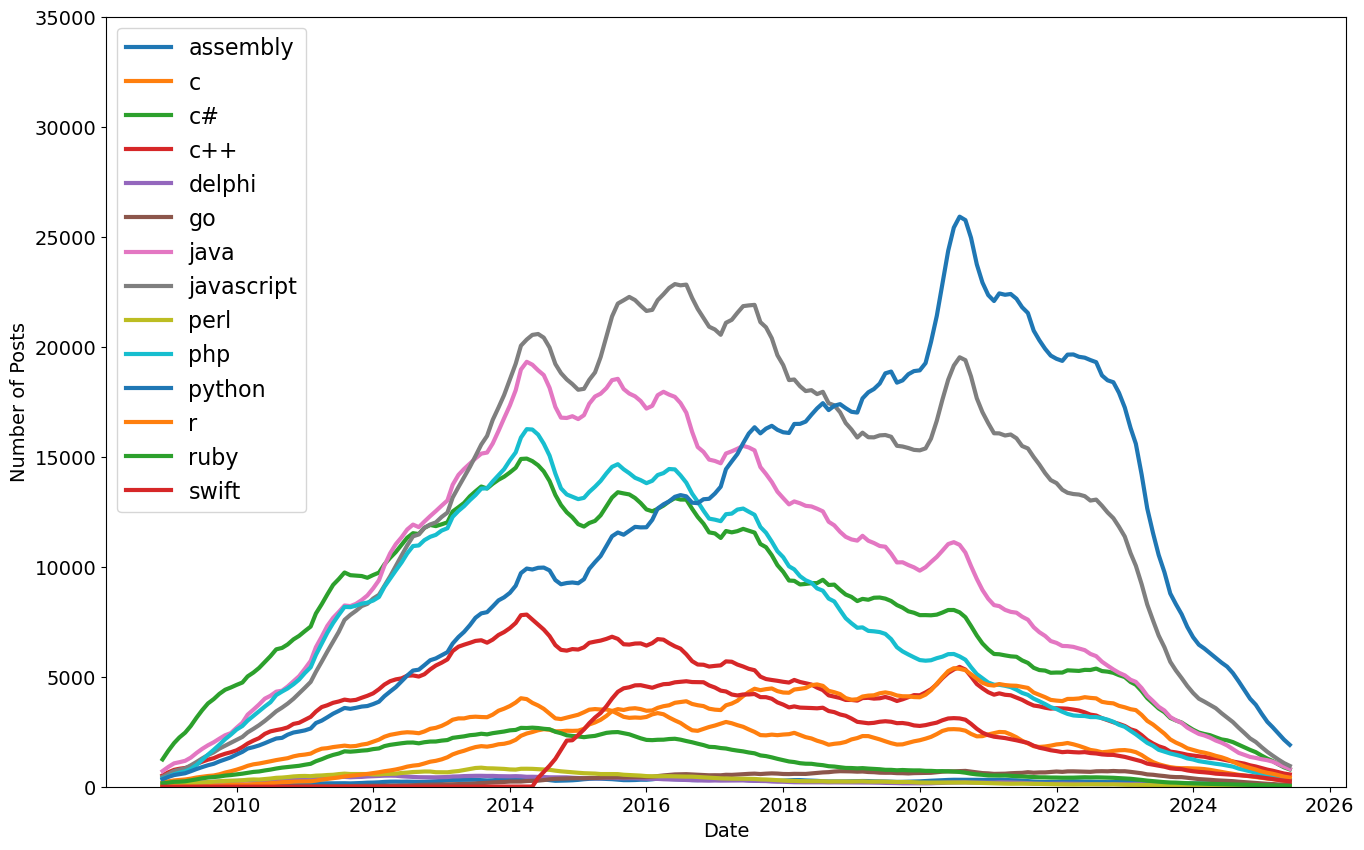

In [31]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

## Interpretation of Smoothed Programming Language Trends (6-Month Rolling Average)

This chart visualizes the popularity of various programming languages over time using a **6-month rolling average**. The purpose of smoothing the data is to reduce short-term fluctuations and make long-term trends easier to observe.

###  What is a Rolling Average?

A rolling average (or moving average) takes the **average of a fixed number of past data points** — in this case, 6 months — and shifts this window forward one time step at a time. This helps reveal **true trends** and removes **noise caused by monthly spikes or drops**.

---

### Key Takeaways:

- The lines in this chart are much **smoother** compared to the original data.
- Major languages like **JavaScript**, **Python**, and **Java** still dominate the conversation.
  - Their trends are now easier to compare and interpret visually.
- **Emerging languages** like **Go** and **Swift** have more visible growth patterns.
- **Older or less popular languages** like **Perl**, **Delphi**, and **Assembly** show a steady decline or flat usage.
- The **sharp declines after 2020** seen in raw data are now **more gradual** and reveal general fading trends rather than short-term dips.

---

###  Why This Matters:

- Smoothed data makes it easier to compare languages **year-over-year**.
- It's useful for presentations, trend analysis, and understanding developer interest at a higher level.
- It reduces distractions from short-term events (e.g., temporary surges in questions or popularity).

